# Final - Analisis y procesamiento de señales - Luis Candela

## Datos a analizar

En este documento se analizará la base de datos titulada:

**_Vibration Data for Axial Ball Bearings and Spall Faults_**

Este conjunto de datos consiste en mediciones de vibración realizadas sobre rodamientos axiales, a los cuales se les indujeron fallas artificiales en las pistas internas o externas. Las fallas consisten en defectos de tipo *spall* (desprendimientos) de diferentes tamaños, generados de forma controlada para estudiar su efecto en la respuesta vibratoria del sistema.

#### Descripción del dataset original

Según la descripción proporcionada por los autores del conjunto de datos:

> Los conjuntos de datos comprenden mediciones de vibración en rodamientos axiales en condiciones tanto saludables como defectuosas. Las condiciones defectuosas se corresponden con fallas artificiales generadas en las pistas interna y externa.  
> 
> El conjunto total está compuesto por 28 archivos, divididos en dos grupos:
>
> - **Grupo 1:** 4 archivos correspondientes a rodamientos sin fallas.  
> - **Grupo 2:** 24 archivos correspondientes a 6 niveles de tamaño de falla combinados con 4 niveles de carga axial aplicada.  
> 
> Cada archivo está en formato MATLAB (`.mat`) y sigue la siguiente convención de nombres:
>  
> **NX_R_S_T.mat**, donde:
>
> - **X**: carga axial aplicada (en kN)  
> - **R**: velocidad del husillo (en rpm)  
> - **S**: ancho del defecto (*spall*) en mm  
> - **T**: ubicación de la falla (pista *interna* o *externa*)  
>
> Cada archivo contiene una única serie temporal correspondiente a la señal de vibración medida por un acelerómetro montado en la pista externa del rodamiento (en el eje radial). La carga y la velocidad permanecen constantes durante cada medición.  
> La frecuencia de muestreo es de **25.6 kHz** y cada señal tiene una duración de **30 segundos**.

Con base en esta información, el análisis buscará identificar y caracterizar las señales de vibración en función de la condición del rodamiento, el tipo y tamaño de falla, así como la carga aplicada. Para ello, se utilizará tanto el nombre de los archivos como el contenido de las señales para organizar y estructurar el análisis de forma eficiente y reproducible.


---

## Objetivo del análisis

El objetivo principal de este trabajo es desarrollar un **filtro adaptado (matched filter)** que permita **detectar e identificar la presencia de fallas** en rodamientos axiales a partir de las señales de vibración registradas. En particular, se busca determinar **cuándo** ocurre una falla y **qué tipo de falla** está presente en función de su localización (pista interna o externa) y su severidad (tamaño del defecto).

Para lograr esto, se utilizarán las señales correspondientes a rodamientos con defectos ya conocidos (fallas artificiales) como base para construir los **patrones característicos de vibración asociados a cada tipo de falla**. Estos patrones serán obtenidos mediante un **procesamiento y filtrado espacial** de los datos, buscando aislar las características más representativas de cada tipo de defecto.

Una vez construidos los patrones, se diseñará e implementará un filtro adaptado que utilice esta información para realizar la detección dentro de nuevas señales. La técnica de matched filtering permite resaltar regiones temporales donde la señal observada se asemeja a un patrón predefinido, lo cual resulta ideal para identificar eventos transitorios como los causados por defectos en rodamientos.

### Objetivos específicos

- Extraer patrones de fallas a partir de señales con condiciones de operación y fallas conocidas.
- Implementar un filtro adaptado que maximice la correlación entre la señal medida y los patrones de falla.
- Aplicar el filtro sobre señales completas para localizar temporalmente la presencia de fallas.
- Evaluar la capacidad de detección del filtro en función de la severidad y ubicación del defecto.

El resultado final esperado es una herramienta que permita analizar señales de vibración y detectar automáticamente la ocurrencia y el tipo de falla, contribuyendo al diagnóstico temprano y al mantenimiento predictivo de sistemas rotativos.

---


## Marco Teórico

### Filtro Adaptado (Matched Filter)

El **filtro adaptado**, también conocido como *matched filter*, es una herramienta ampliamente utilizada en procesamiento de señales para la detección de patrones específicos dentro de una señal ruidosa. Su fundamento se basa en maximizar la relación señal-ruido (SNR) en el punto de detección de un patrón conocido.

En términos matemáticos, el filtro adaptado realiza una **correlación cruzada** entre una señal \( x(t) \) y un patrón o plantilla \( h(t) \) (también llamado *kernel* del filtro). El resultado es una nueva señal \( y(t) \), donde los máximos indican las posiciones temporales en las que la señal original se asemeja al patrón buscado.

$
y(t) = (x \star h)(t) = \int x(\tau) \cdot h(t + \tau) \, d\tau
$

En el caso discreto:

$
y[n] = \sum_{k=0}^{N-1} x[n+k] \cdot h[k]
$

Donde:
- $ x[n] $ es la señal observada.
- $ h[k] $ es el patrón o plantilla del filtro.
- $ y[n] $ es la señal de salida del filtro adaptado.

#### Aplicación en el análisis de vibraciones

En este trabajo, se utilizará el filtro adaptado para detectar eventos característicos relacionados con fallas en rodamientos. Para ello:
- Se extraerá un **patrón de falla** a partir de una sección conocida de la señal.
- Luego, se aplicará el filtro adaptado sobre señales completas para localizar los instantes en los que dicho patrón vuelve a aparecer.

Esta técnica permite mejorar la capacidad de detección frente a ruido y es especialmente útil en entornos donde las señales son complejas y de baja SNR.

---

### Filtrado Espacial Promediado

El **filtrado espacial** hace referencia a una técnica de alineamiento y promedio de segmentos de señal que comparten una estructura común. Este método se utiliza para mejorar la estimación de un patrón repetitivo dentro de una señal contaminada con ruido.

#### Procedimiento general:

1. **Segmentación**: se seleccionan múltiples ventanas de la señal (de longitud fija \( N \)) que contengan una versión del patrón deseado.
2. **Almacenamiento**: cada segmento se almacena como una fila de una matriz de tamaño \( R \times N \), donde \( R \) es el número de ocurrencias.
3. **Promediado**: se realiza un promedio por columnas sobre la matriz para obtener una versión más limpia del patrón deseado.

$
h[k] = \frac{1}{R} \sum_{r=1}^{R} x_r[k]
$

Donde:
- $ x_r[k] $ es el \( r \)-ésimo segmento de la señal.
- $ h[k] $ es el patrón promedio utilizado posteriormente en el filtro adaptado.

#### Relación con señales biomédicas

Este procedimiento es análogo al usado para construir plantillas en señales como el **ECG**, donde se promedian múltiples ciclos cardíacos para obtener una representación clara del complejo QRS. En el contexto de este trabajo, la periodicidad o repetitividad de ciertos eventos de vibración causados por fallas permitirá construir patrones robustos para su detección automática.

---

### Síntesis

El uso combinado de:
- **Filtrado espacial promediado** para generar patrones confiables, y
- **Filtro adaptado** para detectar dichos patrones en señales ruidosas,

Va a permitir desarrollar un sistema efectivo de diagnóstico basado en vibraciones para rodamientos. Esta metodología es extensible a otros dominios donde se deseen identificar eventos transitorios o repetitivos en señales de tiempo.




---
---

## Analisis de los datos

Vamos a comenzar analizando la señal limpia sin daño en los carreras del rodamiento para así tener una idea general de como es la señal sin ningún defecto. Vamos a tomar esto como nuestra base. 

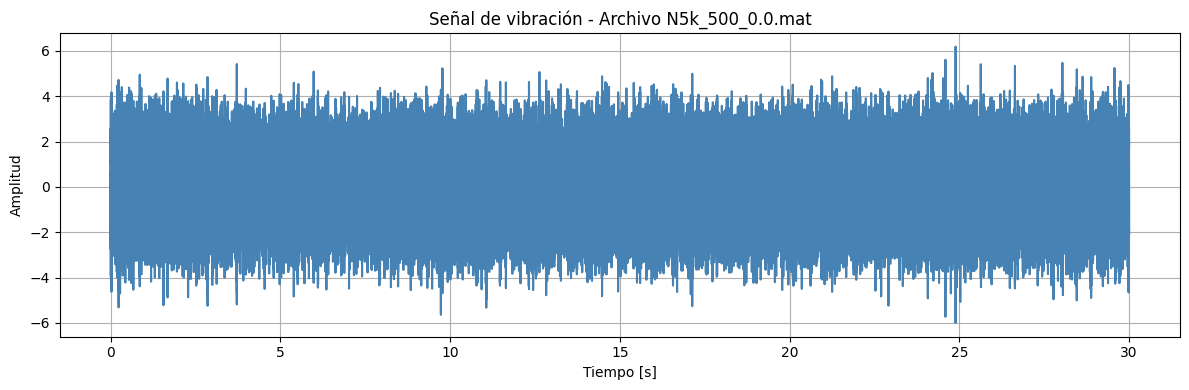

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

# Cargar el archivo .mat
mat_data = sio.loadmat('N5k_500_0.0.mat')

# Extraer la señal
signal = mat_data['y_ini'].squeeze()

# Parámetros de muestreo
fs = 25600  # Hz
t = np.arange(len(signal)) / fs  # Eje de tiempo

# Graficar la señal
plt.figure(figsize=(12, 4))
plt.plot(t, signal, color='steelblue')
plt.title('Señal de vibración - Archivo N5k_500_0.0.mat')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.tight_layout()
plt.show()


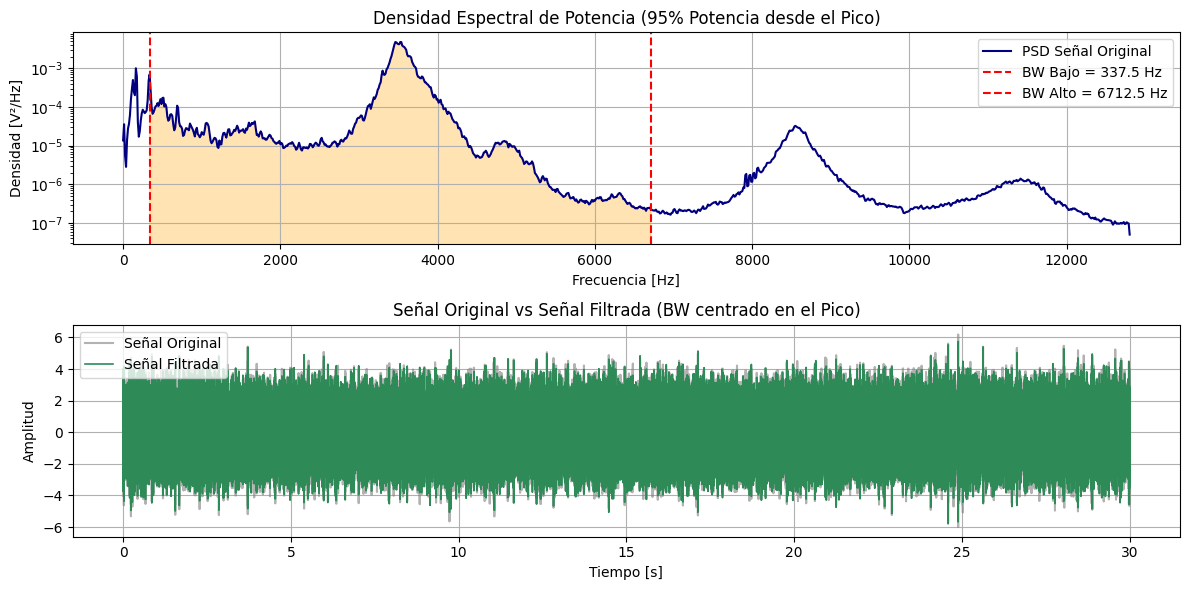

In [9]:
from scipy.signal import welch, iirdesign, sosfiltfilt
import numpy as np
import matplotlib.pyplot as plt

# Calcular la PSD
f, Pxx = welch(signal, fs=fs, nperseg=2048)
total_power = np.trapezoid(Pxx, f)

# Encontrar el pico más alto del espectro
peak_index = np.argmax(Pxx)
peak_freq = f[peak_index]

# Inicializar la acumulación de potencia
cumulative_power = np.zeros_like(Pxx)
cumulative_power[peak_index] = Pxx[peak_index]

# Expandir desde el pico hacia ambos lados
left = peak_index - 1
right = peak_index + 1

while (np.trapezoid(cumulative_power, f) < 0.95 * total_power) and (left >= 0 or right < len(Pxx)):
    if left >= 0:
        cumulative_power[left] = Pxx[left]
        left -= 1
    if right < len(Pxx):
        cumulative_power[right] = Pxx[right]
        right += 1

# Definir los extremos del BW
bw_low = f[left + 1]
bw_high = f[right - 1]

# Diseño del filtro pasabanda
wp = [bw_low / (fs / 2), bw_high / (fs / 2)]
ws = [wp[0] * 0.8, wp[1] * 1.2]
gpass = 1
gstop = 40

sos = iirdesign(wp=wp, ws=ws, gpass=gpass, gstop=gstop,
                ftype='cheby2', output='sos')

# Filtrar la señal
filtered_signal = sosfiltfilt(sos, signal)

# Graficar PSD con BW marcado
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogy(f, Pxx, color='navy', label='PSD Señal Original')
plt.axvline(bw_low, color='red', linestyle='--', label=f'BW Bajo = {bw_low:.1f} Hz')
plt.axvline(bw_high, color='red', linestyle='--', label=f'BW Alto = {bw_high:.1f} Hz')
plt.fill_between(f, Pxx, where=(f >= bw_low) & (f <= bw_high), color='orange', alpha=0.3)
plt.title('Densidad Espectral de Potencia (95% Potencia desde el Pico)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad [V²/Hz]')
plt.grid(True)
plt.legend()

# Graficar señales
plt.subplot(2, 1, 2)
plt.plot(t, signal, color='gray', alpha=0.6, label='Señal Original')
plt.plot(t, filtered_signal, color='seagreen', linewidth=1.2, label='Señal Filtrada')
plt.title('Señal Original vs Señal Filtrada (BW centrado en el Pico)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


---
---

# Como vamos a filtrar la señal ?

## Filtrado de Señales Basado en su Contenido Espectral

En esta sección vamos a describir con mayor precisión cómo se realiza el filtrado de las señales antes de llevar a cabo el análisis principal. Aunque anteriormente se mencionaron algunos aspectos del procesamiento de señales que vamos a utilizar, acá vamos a detallar mas especificamente como y porque vamos a realizar el primer filtrado de la señal. 

---

## ¿Por qué es necesario filtrar?

En el procesamiento de señales, filtrar no es simplemente una cuestión de "limpiar ruido", sino una herramienta fundamental para **resaltar la información relevante** y **reducir la complejidad del análisis**. Muchas veces, las señales reales están acompañadas de componentes de frecuencia que no pertenecen al fenómeno de interés, ya sea por ruido del sensor, interferencias externas o procesos biológicos no deseados.

Si no eliminamos estos componentes, podrían:

- Enmascarar los patrones significativos,
- Influir negativamente en análisis como detección de eventos, extracción de características, o clasificación,
- Aumentar la varianza de métricas calculadas y reducir la robustez de los resultados.

Por lo tanto, antes de analizar la señal en detalle, es esencial conservar solo las frecuencias **realmente representativas del fenómeno observado**.

---

## Estimación espectral

El primer paso que realizamos es estimar la **Densidad Espectral de Potencia (PSD)** de la señal. La PSD describe cómo se distribuye la potencia de la señal a lo largo de las distintas frecuencias. Es decir, nos muestra en qué rangos de frecuencia está concentrada la "energía" de la señal.

Para esta estimación usamos el **método de Welch**, que es una técnica robusta y eficiente que consiste en:

1. Dividir la señal en segmentos superpuestos,
2. Aplicar una ventana (por ejemplo, de Hamming) para reducir el efecto de bordes,
3. Calcular la transformada de Fourier de cada segmento,
4. Promediar los espectros de todos los segmentos.

Este procedimiento reduce la varianza de la estimación espectral y es ampliamente usado en procesamiento de señales biomédicas, ingeniería eléctrica, neurociencia, etc.

---

## Ancho de banda efectivo: potencia acumulada

Una vez obtenida la PSD, buscamos determinar el **ancho de banda efectivo** de la señal. Lo hacemos calculando el rango de frecuencias que concentra el **95% de la potencia total**. Esto se fundamenta en el principio de que la potencia total de una señal (en el dominio de la frecuencia) está dada por el área bajo la curva de su PSD.

Este enfoque tiene ventajas importantes:

- Es **adaptativo**: el ancho de banda se ajusta a cada señal individual, sin necesidad de definir umbrales fijos,
- Elimina de forma sistemática los extremos espectrales con baja contribución energética (habitualmente ruido o artefactos),
- Nos permite filtrar de forma objetiva, sin introducir sesgos subjetivos.

---

## Filtros IIR: diseño eficiente para señales limpias

Una vez identificado el rango de frecuencias útil, utilizamos un **filtro IIR (Infinite Impulse Response)** de tipo **pasa banda** para eliminar las componentes fuera de este intervalo.

Los filtros IIR presentan las siguientes características que justifican su elección en este contexto:

- **Eficiencia computacional**: al requerir menos coeficientes que un filtro FIR para una respuesta similar,
- **Respuesta más aguda en frecuencia**: lo que permite separar mejor las bandas,
- **Simplicidad de implementación**: especialmente útil cuando se trabaja con muchas señales o en tiempo real.

Además, dado que las señales en este análisis no presentan un nivel elevado de ruido ni artefactos extremos, los filtros IIR son adecuados y no presentan riesgos significativos de inestabilidad o distorsión.

---

## Aplicación general del método

Este procedimiento será aplicado a **todas las señales** analizadas en este estudio. Para cada una:

1. Se calcula su PSD individualmente,
2. Se estima su ancho de banda efectivo (95% de la potencia),
3. Se diseña y aplica un filtro IIR pasa banda con los límites obtenidos.

Este esquema garantiza que el análisis posterior se realice sobre señales optimizadas, donde se conserva la mayor parte de la in


---
---

Habiendo introducido esto vamos a graficar las distintas señales de ruido que tenemos



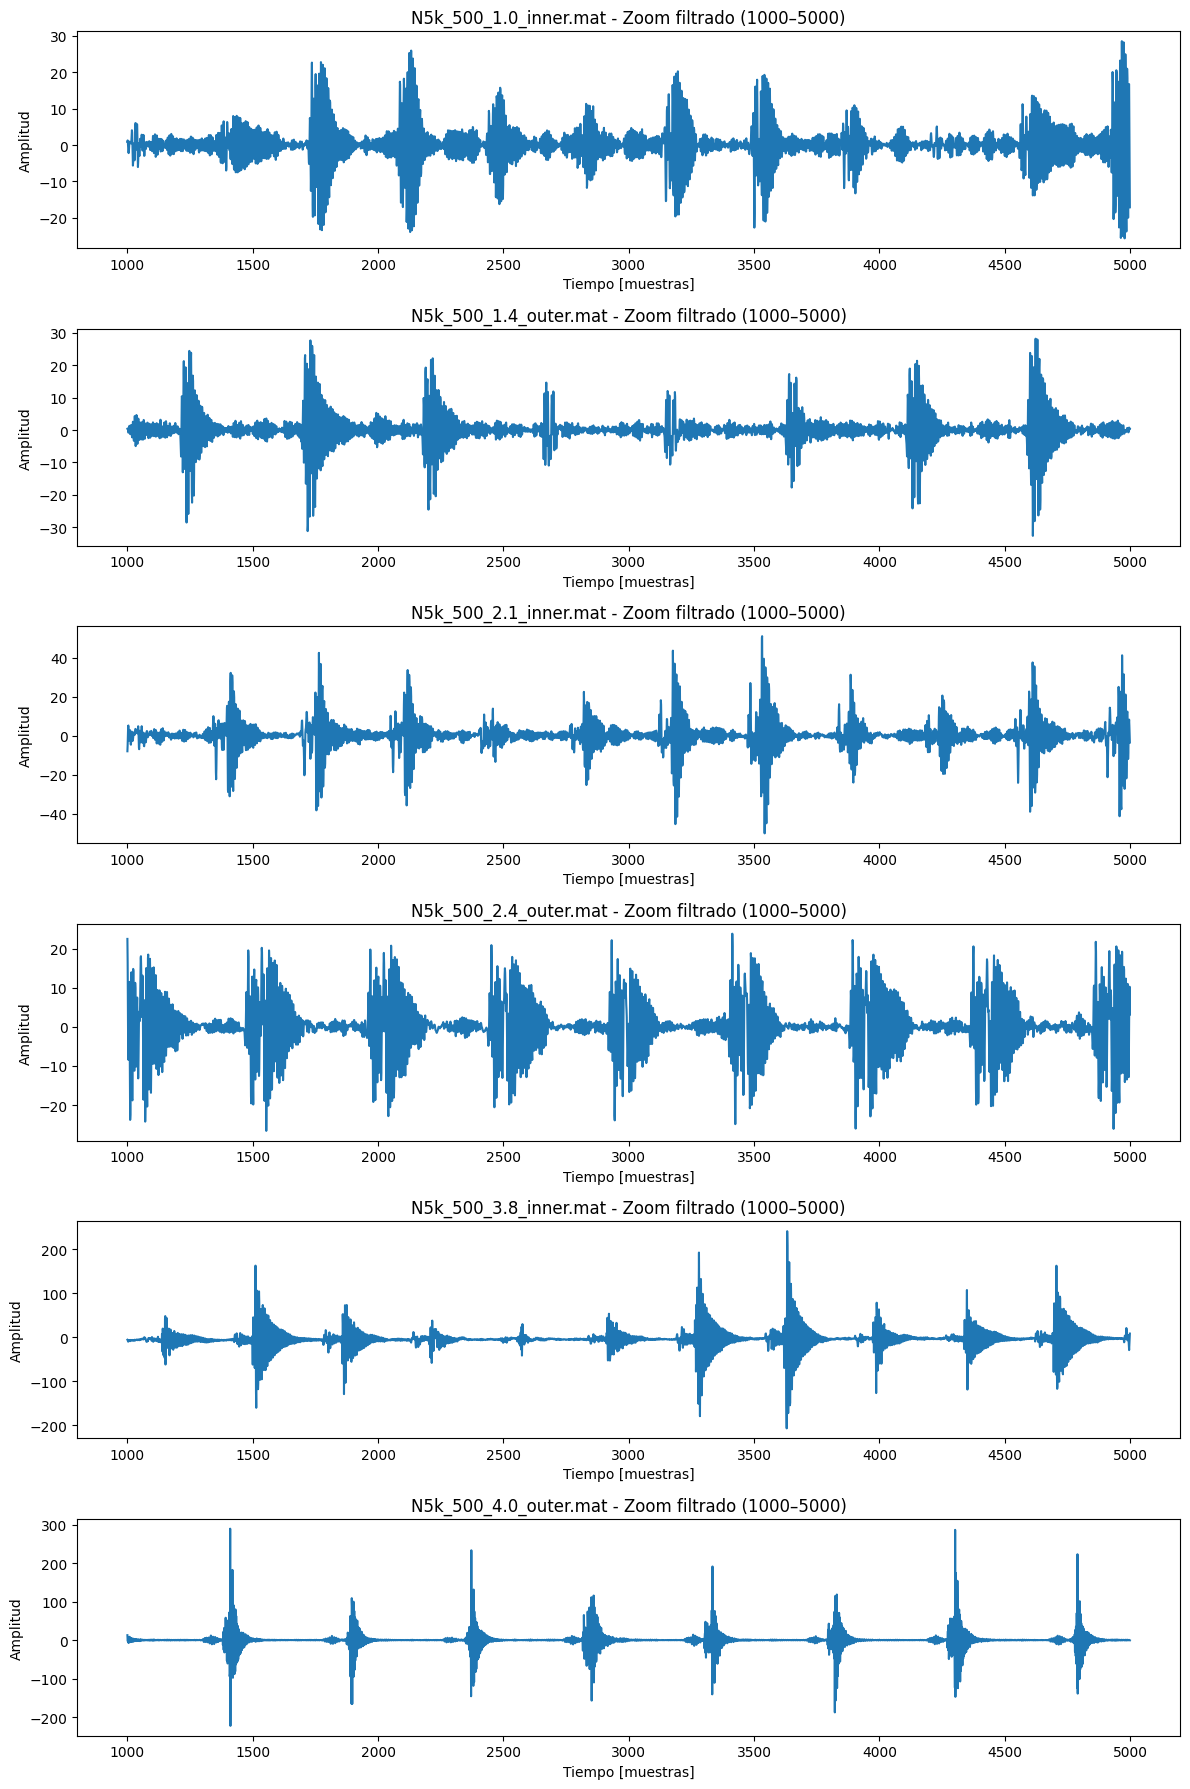

In [13]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch, iirfilter, sosfiltfilt
import os

file_paths = [
    "N5k_500_1.0_inner.mat",
    "N5k_500_1.4_outer.mat",
    "N5k_500_2.1_inner.mat",
    "N5k_500_2.4_outer.mat",
    "N5k_500_3.8_inner.mat",
    "N5k_500_4.0_outer.mat"
]

fs = 25600  # Frecuencia de muestreo en Hz

def compute_95_bw(freqs, psd):
    peak_idx = np.argmax(psd)
    total_power = np.sum(psd)
    power_sum = psd[peak_idx]
    left = right = peak_idx
    while power_sum < 0.98 * total_power and (left > 0 or right < len(psd) - 1):
        if left > 0: left -= 1
        if right < len(psd) - 1: right += 1
        power_sum = np.sum(psd[left:right])
    bw = freqs[right] - freqs[left]
    return freqs[peak_idx], bw

# Graficar solo los zooms
fig, axs = plt.subplots(6, 1, figsize=(12, 18))
fig.subplots_adjust(hspace=0.6)

for idx, path in enumerate(file_paths):
    data = sio.loadmat(path)
    key = next(k for k in data if not k.startswith('__'))
    signal = np.squeeze(data[key])

    freqs, psd = welch(signal, fs=fs, nperseg=2048)
    peak_freq, bw_95 = compute_95_bw(freqs, psd)

    lowcut = max(1.0, peak_freq - bw_95 / 2)
    highcut = min(fs / 2 - 1, peak_freq + bw_95 / 2)
    sos = iirfilter(N=4, Wn=[lowcut, highcut], btype='band', ftype='butter', fs=fs, output='sos')
    filtered = sosfiltfilt(sos, signal)

    t = np.arange(len(filtered))
    axs[idx].plot(t[1000:5000], filtered[1000:5000])
    axs[idx].set_title(f"{os.path.basename(path)} - Zoom filtrado (1000–5000)")
    axs[idx].set_xlabel("Tiempo [muestras]")
    axs[idx].set_ylabel("Amplitud")

plt.tight_layout()
plt.show()
